In [1]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv('non_linear_example.csv')

In [5]:
data.head()

,Age,Gender,Exper,Salary
0,50,1,10,180
1,29,1,10,163
2,36,1,4,134
3,34,2,4,132
4,46,1,9,188


In [6]:
data_np = data.values

In [7]:
data_np

array([[ 50,   1,  10, 180],
       [ 29,   1,  10, 163],
       [ 36,   1,   4, 134],
       [ 34,   2,   4, 132],
       [ 46,   1,   9, 188],
       [ 33,   1,   3, 127],
       [ 26,   2,   8, 141],
       [ 23,   1,   5, 122],
       [ 48,   1,   7, 169],
       [ 24,   1,   5, 114],
       [ 55,   2,  13, 160],
       [ 60,   1,  20, 156],
       [ 58,   1,  18, 150],
       [ 44,   2,  13, 150],
       [ 40,   2,  10, 151]], dtype=int64)

In [8]:
import matplotlib.pyplot as plt

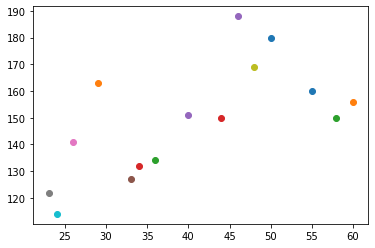

In [9]:
for v in data_np:
    plt.scatter(v[0],v[-1])
plt.show()

In [10]:
# 종속변수와 독립변수 데이터 분리하기
y = data_np[:,-1]
X = data_np[:,:-1]

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [11]:
model.score(X,y)

0.4106803236813322

Age의 제곱항 포함하기

In [12]:
X_new = np.insert(X, 1, X[:,0]**2, axis=1)

In [13]:
X_new

array([[  50, 2500,    1,   10],
       [  29,  841,    1,   10],
       [  36, 1296,    1,    4],
       [  34, 1156,    2,    4],
       [  46, 2116,    1,    9],
       [  33, 1089,    1,    3],
       [  26,  676,    2,    8],
       [  23,  529,    1,    5],
       [  48, 2304,    1,    7],
       [  24,  576,    1,    5],
       [  55, 3025,    2,   13],
       [  60, 3600,    1,   20],
       [  58, 3364,    1,   18],
       [  44, 1936,    2,   13],
       [  40, 1600,    2,   10]], dtype=int64)

In [14]:
model1 = LinearRegression()
model1.fit(X_new, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
model1.score(X_new, y)

0.5990754144437138

In [16]:
model1.coef_

array([  8.62626622,  -0.10082658, -11.28594601,   2.28293442])

## PolynomialFeatures 사용해 보기

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
poly = PolynomialFeatures(2) # 각 변수의 2차항과 interaction terms 포함

In [14]:
X_poly = poly.fit_transform(X)

In [16]:
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

LinearRegression()

In [17]:
model_poly.score(X_poly, y)

0.9153940558243155

In [18]:
model_poly.coef_

array([ 0.00000000e+00,  2.16860343e+00,  1.38393563e+00,  2.00601466e+01,
        1.84167510e-02, -9.05541063e-02, -2.63965550e-01,  4.15180689e+00,
       -2.62574654e+00, -2.12618381e-01])